# Loading data

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dftr=pd.read_csv('/content/drive/MyDrive/DATA _SCV/datavi_train.csv',sep=';')

In [ ]:
dfte=pd.read_csv('/content/drive/MyDrive/DATA _SCV/datavi_test.csv',sep=';')

# Libraries

In [ ]:
import numpy as np
import pandas as pd
import re
import statistics
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # To supress warnings
from scipy.stats import skew
plt.style.use('ggplot')
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
dftr.head(2)

name  year  selling_price  km_driven    fuel  \
0    Tata Nexon 1.5 Revotorq XM  2018         850000       9500  Diesel   
1  Hyundai i20 Active SX Diesel  2018         750000      30000  Diesel   

  seller_type transmission        owner     mileage   engine  max_power  \
0  Individual       Manual  First Owner   21.5 kmpl  1497 CC  108.5 bhp   
1  Individual       Manual  First Owner  21.19 kmpl  1396 CC  88.76 bhp   

                   torque  seats  
0     260Nm@ 1500-2750rpm    5.0  
1  219.66nm@ 1500-2750rpm    5.0

In [ ]:
dfte.head(2)

Id                             name  year  km_driven    fuel seller_type  \
0   1  Skoda Rapid 1.6 MPI AT Elegance  2016      11000  Petrol      Dealer   
1   2              Honda City i VTEC V  2017      35000  Petrol  Individual   

  transmission        owner    mileage   engine  max_power          torque  \
0    Automatic  First Owner  14.3 kmpl  1598 CC  103.5 bhp  153Nm@ 3800rpm   
1       Manual  First Owner  17.8 kmpl  1497 CC  117.3 bhp  145Nm@ 4600rpm   

   seats  
0    5.0  
1    5.0

# DATA PROCESS + MISSING VALUES

Because each car is produced by a specific company but each car has different versions. So, we take only the brand of the car. 

In [ ]:
def extract_brand(train,test):  
  train['car_brand']=train['name'].apply(lambda x: x.split(' ')[0].strip())
  test['car_brand']=test['name'].apply(lambda x: x.split(' ')[0].strip())
  train=train.drop('name',axis=1)
  test=test.drop('name',axis=1)
  return train,test

In [ ]:
dftr,dfte=extract_brand(dftr,dfte)

In [ ]:
dftr.head(2)

name  year  selling_price  km_driven    fuel  \
0    Tata Nexon 1.5 Revotorq XM  2018         850000       9500  Diesel   
1  Hyundai i20 Active SX Diesel  2018         750000      30000  Diesel   

  seller_type transmission        owner     mileage   engine  max_power  \
0  Individual       Manual  First Owner   21.5 kmpl  1497 CC  108.5 bhp   
1  Individual       Manual  First Owner  21.19 kmpl  1396 CC  88.76 bhp   

                   torque  seats car_brand  
0     260Nm@ 1500-2750rpm    5.0      Tata  
1  219.66nm@ 1500-2750rpm    5.0   Hyundai

In [ ]:
#@title
dftr['car_brand'] = dftr['name'].str.split(" ").str[0] 
dftr=dftr.drop(labels='name',axis=1)
dfte['car_brand'] = dfte['name'].str.split(" ").str[0] 
dfte=dfte.drop(labels='name',axis=1)
# lấy tên hãng xe

##NUMERIC DATA PROCESS

Dealing with numeric data : MILLEAGE, ENGINE, MAX_POWER, TORQUE by first **get rid of unit** of each then taking only **number** and **fil NaN values with median** of each coloumn


1. MILLEAGE PROCESSING


In [ ]:
dftr['mileage1']=dftr['mileage']
dftr['mileage1']=dftr['mileage1'].apply(lambda x: float(str(x).split(' ')[0].strip())*0.0016747  if str(x).endswith('km/kg') else ( float(str(x).split(' ')[0].strip())*2.35 if str(x).endswith('kmpl') else 0))
dftr.mileage= dftr.mileage.fillna(dftr['mileage1'].median())
dftr['mileage']=dftr['mileage'].apply(lambda x: float(str(x).split(' ')[0].strip())*0.0016747  if str(x).endswith('km/kg') else ( float(str(x).split(' ')[0].strip())*2.35 if str(x).endswith('kmpl') else  float(str(x).split(' ')[0])))

In [ ]:
dftr=dftr.drop('mileage1',axis=1)

Because milleage has 2 different units:  **km/kg** and **kmpl** (kilometers per litre). Then we have to **convert** **'mileage'** to the same unit in the US measurement **mpg** - miles per gallon

 MILEAGE CONVERSION
*   1 kmpl=2.35 mpg(US)
*  1 km/kg= 0.0016747 mpg(US)





In [ ]:
#@title
def mileage_median(df):
    
    Correct_Mileage= []
    for i in df.mileage:
        if str(i).endswith('km/kg'):
            i = i.split(" ")[0] 
            i = float(i)* 0.0016747 
            Correct_Mileage.append(i)
        elif str(i).endswith('kmpl'):
            i = i.split(" ")[0] 
            i = float(i)* 2.35
            Correct_Mileage.append(float(i))            
    return  statistics.median(Correct_Mileage)

In [ ]:
#@title
def convert_mileage(df):
    
    Correct_Mileage= []
    for i in df.mileage:
        if str(i).endswith('km/kg'):
            i = i.split(" ")[0] 
            i = float(i)* 0.0016747 
            Correct_Mileage.append(i)
        elif str(i).endswith('kmpl'):
            i = i.split(" ")[0] 
            i = float(i)* 2.35
            Correct_Mileage.append(float(i))
        elif i==0:
            i=mileage_median(df)
            Correct_Mileage.append(float(i))
            
    return  Correct_Mileage


In [ ]:
#@title
dftr.mileage=convert_mileage(dftr)


In [ ]:
#@title
dfte.mileage=convert_mileage(dfte)


2. ENGINE PROCESSING

In [ ]:
dftr.head(2)

year  selling_price  km_driven    fuel seller_type transmission  \
0  2018         850000       9500  Diesel  Individual       Manual   
1  2018         750000      30000  Diesel  Individual       Manual   

         owner  mileage   engine  max_power                  torque  seats  \
0  First Owner  50.5250  1497 CC  108.5 bhp     260Nm@ 1500-2750rpm    5.0   
1  First Owner  49.7965  1396 CC  88.76 bhp  219.66nm@ 1500-2750rpm    5.0   

  car_brand max_power1  
0      Tata      108.5  
1   Hyundai      88.76

In [ ]:
dftr['max_power']=dftr['max_power'].fillna(0)
 regex = re.compile('[a-zA-Z]')
 dftr['max_power1']=dftr['max_power'].apply(lambda x: ''.join(regex.findall(str(x))))
 dftr['max_power1'].value_counts()

In [ ]:
float(dftr['max_power1'][0])

108.5

In [ ]:
dftr['max_power1']=dftr['max_power']
dftr['max_power1']=dftr['max_power1'].apply(lambda x: str(x).split(' ')[0].strip()  if str(x).endswith('bhp') else str(x).split(' ')[0].strip())
# dftr.max_power= dftr.max_power.fillna(dftr['max_power1'].median())
# dftr['mileage']=dftr['mileage'].apply(lambda x: float(str(x).split(' ')[0].strip())*0.0016747  if str(x).endswith('km/kg') else ( float(str(x).split(' ')[0].strip())*2.35 if str(x).endswith('kmpl') else  float(str(x).split(' ')[0])))

In [ ]:
dftr['engine'] = dftr['engine'].str.replace('CC','')
dftr['engine']=pd.to_numeric(dftr['engine'])
dftr['engine']= dftr['engine'].fillna( dftr['engine'].median())
# dftr['engine']=pd.to_numeric(dftr['engine'])


In [ ]:
dfte['engine'] = dfte['engine'].str.replace('CC','')
dfte['engine']=pd.to_numeric(dfte['engine'])
dfte['engine']= dfte['engine'].fillna( dfte['engine'].median())
# dftr['engine']=pd.to_numeric(dftr['engine'])


3. MAX_POWER PROCESSING

In [ ]:
dftr['max_power']= dftr['max_power'].fillna(0)
dfte['max_power']= dfte['max_power'].fillna(0)


In [ ]:
def max_power_process(df):   
    torque_value= []
    a=[]
    for i in df.max_power:
        if i==0:
            torque_value.append([str(0)])
        else:    
            x=re.split('[\D]+[\D]+',str(i))
            torque_value.append(x)
    for j in range(len(torque_value)):
        if len(torque_value[j][0])==0:
                a.append(float(0))
        else:
                b=float(torque_value[j][0])  
                a.append(b)
    return a


In [ ]:
dftr.max_power=max_power_process(dftr)
median_power=dftr.max_power.median()
dftr.max_power=dftr.max_power.replace( 0, np.nan)
dftr.max_power=dftr.max_power.fillna(median_power)
dftr.max_power=pd.to_numeric(dftr.max_power)

In [ ]:
dftr.max_power=max_power_process(dftr)
median_power=dftr.max_power.median()
dftr.max_power=dftr.max_power.replace( 0, np.nan)
dftr.max_power=dftr.max_power.fillna(median_power)
dftr.max_power=pd.to_numeric(dftr.max_power)


In [ ]:
dfte.max_power=max_power_process(dfte)
median_power=dfte.max_power.median()
dfte.max_power=dfte.max_power.replace( 0, np.nan)
dfte.max_power=dfte.max_power.fillna(median_power)

dfte.max_power=pd.to_numeric(dfte.max_power)

4. TORQUE PROCESSING

TORQUE column contains 2 important value: torque(mô men xoắn) and rpm( round per minute)

*  torque: how strong the machine is
*  rpm   : how fast the machine is



*   For **'torque'** value, we take the **first number** and fill nan with torque median
*   For **'rpm'** value, take **min and max** rpm values and calculate the **rpm average** value (max+min)/2, then fill nan with median



In [ ]:
dftr['dumi']=dftr['torque'].copy(deep=True)
dfte['dumi']=dfte['torque'].copy(deep=True)

In [ ]:
dftr['torque']= dftr['torque'].fillna(0)
dfte['torque']= dfte['torque'].fillna(0)

In [ ]:
dftr['dumi']=dftr['dumi'].fillna(0)
dfte['dumi']=dfte['dumi'].fillna(0)


In [ ]:
def torque_process(df):   
    torque_value= []
    a=[]
    for i in df.torque:
        if i==0:
            torque_value.append([str(0)])
        else:    
            x=re.findall('\d[\d,.-]*',str(i))
            torque_value.append(x)
        
    for j in range(len(torque_value)):
        if len(torque_value[j])>=2:
            b=float(torque_value[j][0])
            a.append(b)
        elif len(torque_value[j])==1:
            if torque_value[j][0] in ['']:
                a.append(float(0))
            else:
                a.append(float(torque_value[j][0]))
        elif len(torque_value[j])==0:
            a.append(float(0))
    return  a


In [ ]:
def rpm_process(df):   
    rpm_value= []
    c=[]
    e=[]
    h=[]
    q=[]
    h1=[]
    for i in df['dumi']:
        if i==0:
            rpm_value.append([str(0)])
        else:    
            x=re.split('[\D]+[\D]+',str(i))
            rpm_value.append(x)
            
    for j in range(len(rpm_value)):
        if len(rpm_value[j])>1:
            if len(rpm_value[j][1])==0:
                c.append(float(0))
            elif len(rpm_value[j][1])>=1:
                d=str(rpm_value[j][1])
                c.append(d)
        if len(rpm_value[j])==1:
            c.append(rpm_value[j][0])
            
            
    for i in range(len(c)):  
        if type(c[i])==str:
            if c[i].find('-')>=0:
                e.append(c[i].split('-'))
            elif c[i].find('~')>=0:
                e.append(c[i].split('~'))    
            elif c[i].find('-')==-1 or c[i].find('~')==-1:
                e.append([c[i]])
        if type(c[i])==float:
            e.append([str(c[i])])

        
    for f in range(len(e)):
        if len(e[f])==2:
            q1=[]
            for j in range(len(e[f])):
                    q1.append(e[f][j].replace(',',''))  
            h.append(q1)
        elif len(e[f])==1:
                if float(e[f][0].replace(',',''))>0:
                    h.append([e[f][0].replace(',','')])
                elif float(e[f][0].replace(',',''))==0:
                    h.append(['0'])
        elif len(e[f])==0:
            h.append(['0'])
            
            
            
    for i in range(len(h)):
        if len(h[i])==2:
            l=(float(h[i][1])+float(h[i][0]))/float(2)
            h1.append(float(l))
        elif len(h[i])==1:
            if h[i][0]=='':
                h1.append(float(0))
            elif float(h[i][0])>=0:
                h1.append(float(h[i][0]))
             
    return h1

In [ ]:
dftr['torque']=torque_process(dftr)
median=dftr['torque'].median()
dftr['torque']=dftr['torque'].replace( 0, np.nan)
dftr['torque']=dftr['torque'].fillna(median)


In [ ]:
dfte['torque']=torque_process(dfte)
median=dfte['torque'].median()
dfte['torque']=dfte['torque'].replace( 0, np.nan)
dfte['torque']=dfte['torque'].fillna(median)

In [ ]:
dftr['avg_rpm']=rpm_process(dftr)
rpm_median=dftr['avg_rpm'].median()
dftr['avg_rpm']=dftr['avg_rpm'].replace( 0, np.nan)
dftr['avg_rpm']=dftr['avg_rpm'].fillna(rpm_median)


In [ ]:
dfte['avg_rpm']=rpm_process(dfte)
rpm_median=dfte['avg_rpm'].median()
dfte['avg_rpm']=dfte['avg_rpm'].replace( 0, np.nan)
dfte['avg_rpm']=dfte['avg_rpm'].fillna(rpm_median)

5. SEAT PROCESSING

In [ ]:
dftr['seats']=dftr['seats'].fillna(dftr['seats'].mean())
dfte['seats']=dfte['seats'].fillna(dfte['seats'].mean())

# HANDLING DUPLICATES VALUES + OUTLIER



*   For duplicates values, we delete them
*   For outliers values, We identify them by **plotting** and **cutting** them off the dataset. Because the total number of data is not much, for which if we use **IQR** method to identify and handel the data which therefore leads data to the edge of being **biased**



In [ ]:
dftr_dub=dftr
dfte_dub=dfte

In [ ]:
dftr_dub=dftr_dub.drop('dumi',axis=1)
dfte_dub=dfte_dub.drop('dumi',axis=1)

We got 2 choices of handling with outlier

In [ ]:
dftr_dub=dftr_dub[(dftr_dub['year']>1983)]
dftr_dub=dftr_dub[(dftr_dub['selling_price']<6523000)]
dftr_dub=dftr_dub[(dftr_dub['km_driven']<426000)]
dftr_dub=dftr_dub[((dftr_dub['mileage']>1)&(dftr_dub['mileage']<98.7))]
dftr_dub=dftr_dub[(dftr_dub['engine']<3198)]
dftr_dub=dftr_dub[(dftr_dub['max_power']<258)]
dftr_dub=dftr_dub[(dftr_dub['torque']<619)]
dftr_dub=dftr_dub[(dftr_dub['avg_rpm']<21800.0)]
dftr_dub=dftr_dub[(dftr_dub['seats']>1)&(dftr_dub['seats']<14)]


In [ ]:
#dftr_dub=dftr_dub[(dftr_dub['year']>1983)]
# dftr_dub=dftr_dub[(dftr_dub['selling_price']<5500000)]
# dftr_dub=dftr_dub[(dftr_dub['km_driven']<400000)]
# dftr_dub=dftr_dub[((dftr_dub['mileage']>5)&(dftr_dub['mileage']<98.7))]
# dftr_dub=dftr_dub[(dftr_dub['engine']<=2800)]
# dftr_dub=dftr_dub[(dftr_dub['max_power']<=250)]
# dftr_dub=dftr_dub[(dftr_dub['torque']<=550)]
# dftr_dub=dftr_dub[(dftr_dub['avg_rpm']<20000)]
# dftr_dub=dftr_dub[(dftr_dub['seats']>1)&(dftr_dub['seats']<=11)]

In [ ]:
dftr_final=dftr_dub
dfte_final=dfte_dub

## ONE-HOT-ENCODING Categorical data


In [ ]:
#pip install category_encoders

In [ ]:
import category_encoders as ce
encoder=ce.OneHotEncoder(use_cat_names=True)
dftr_final=encoder.fit_transform(dftr_final)
dfte_final=encoder.transform(dfte_final)

We also got some choice of cutting off some features

In [ ]:
dftr_final=dftr_final.drop(labels=['mileage','km_driven','avg_rpm'],axis=1)
dfte_final=dfte_final.drop(labels=['mileage','km_driven','avg_rpm'],axis=1)
#1

In [ ]:
# dftr_final=dftr_final.drop(labels=['avg_rpm','mileage','km_driven','seats'],axis=1)
# dfte_final=dfte_final.drop(labels=['avg_rpm','mileage','km_driven','seats'],axis=1)
#2

In [ ]:
# dftr_final=dftr_final.drop(labels=['km_driven','avg_rpm','seats'],axis=1)
# dfte_final=dfte_final.drop(labels=['km_driven','avg_rpm','seats'],axis=1)
#3

# EDA

We generate reports with overall information on dataset:

*  Overview by clicking below into each catogory 
*  To view statistical information, correlation, relationship, histogram, extreme values.. clicking into **'toggle detail'** 
 

In [ ]:
#pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip


In [ ]:
from pandas_profiling import ProfileReport
profile = ProfileReport(dftr_dub, title="Pandas Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Beside report, we can look cat specific below diagrams 


** DISTRIBUTION diagrams** on numerical data 

----Observations-----
*   selling price data is positively right skew
*   Except for 'year' (left skewed) and 'mileage'- quite normal distribution
*   Most of data are not normal distribution 



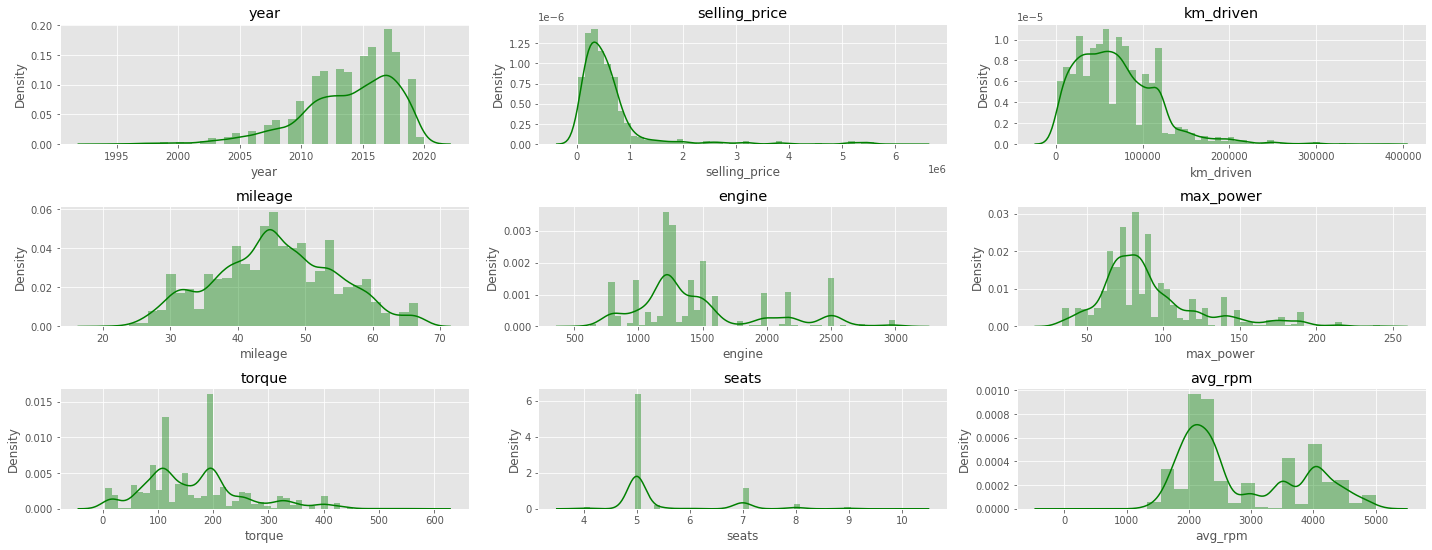

In [ ]:
plt.style.use('ggplot')
numeric_columns = ['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'torque',
        'seats', 'avg_rpm']
plt.figure(figsize=(20,25))

for i, variable in enumerate(numeric_columns):
                plt.subplot(10,3,i+1)
                sns.distplot(dftr_dub[variable],kde=True,color='green')
                plt.tight_layout()
                plt.title(variable)


2. COUNTING PLOT FOR CATEGORICAL DATA

----OBSERVATION----

*   Most sold cars have diesel fuel, seller type are individual having manual transmission and most of belong to first owner
*      Most of them are manual transmission and belong to first owner








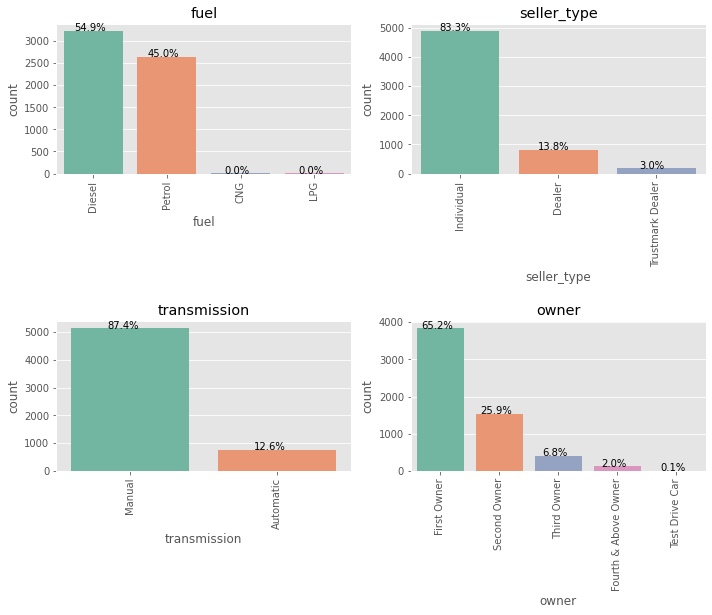

In [ ]:
cat_columns=['fuel', 'seller_type','transmission', 'owner'] #cars.select_dtypes(exclude=np.number).columns.tolist()

plt.figure(figsize=(10,15))

for i, variable in enumerate(cat_columns):
        plt.subplot(4,2,i+1)
        order = dftr_dub[variable].value_counts(ascending=False).index    
        ax=sns.countplot(x=dftr_dub[variable], data=dftr_dub , order=order ,palette='Set2')
        for p in ax.patches:
                percentage = '{:.1f}%'.format(100 * p.get_height()/len(dftr_dub[variable]))
                x = p.get_x() + p.get_width() / 2 - 0.05
                y = p.get_y() + p.get_height()
                plt.annotate(percentage, (x, y),ha='center')
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.title(variable)

CAR BRAND COUNTING 

*   There are many car brand sold which ranges from normal to luxury brand
*   Car brands are most prefered include: Maruti, Huyndai, Mahindran,Tata...



Text(0.5, 1.0, ' Car brand  diagram')

<Figure size 1440x720 with 0 Axes>

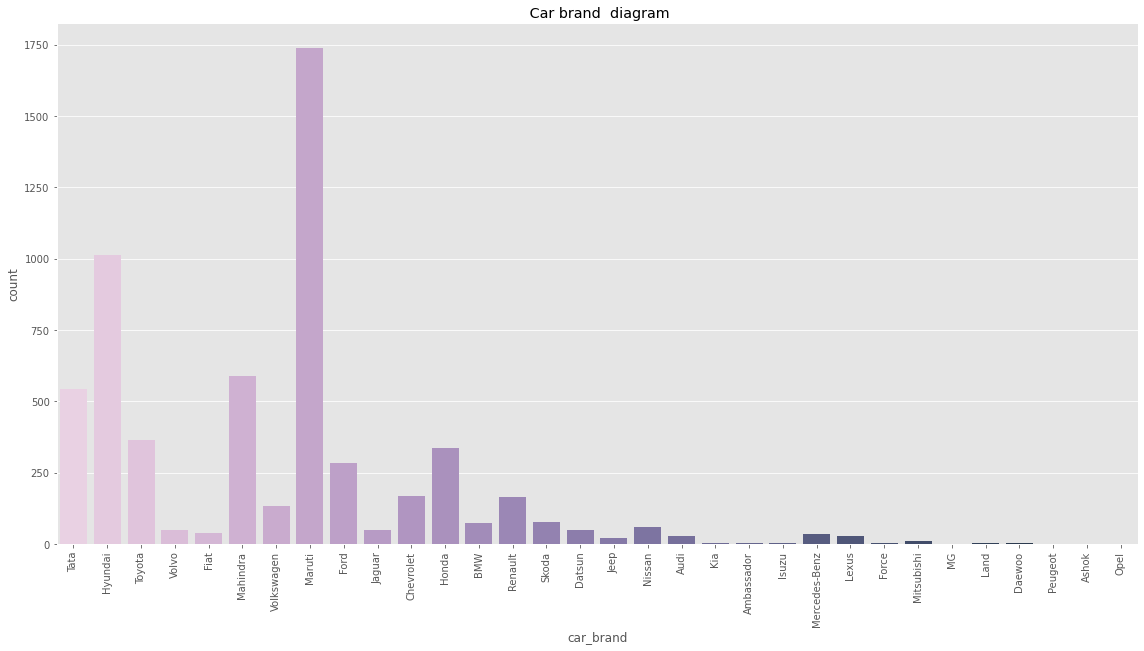

In [ ]:
var = "car_brand"
plt.figure(figsize=(20, 10))
sns.catplot(x=var, kind="count", palette="ch:-0.5", height=8, aspect=2, data=dftr_dub);
plt.xticks(rotation=90)
plt.title(' Car brand  diagram')

SCATTER PLOT VS BOXPLOT FOR NUMERIC DATA
OBSERVATION
*  After handeling with outlier, these plot shows: there still exists many unnormal points in each data features. 

* This indicates that the selling price is vulnerable especially with some feature such as : engine, max_power, torque, milleage  
*   There strong connection between selling price with year and km_Driven which are easily known as considerable factors affecting the customer buying decision. 




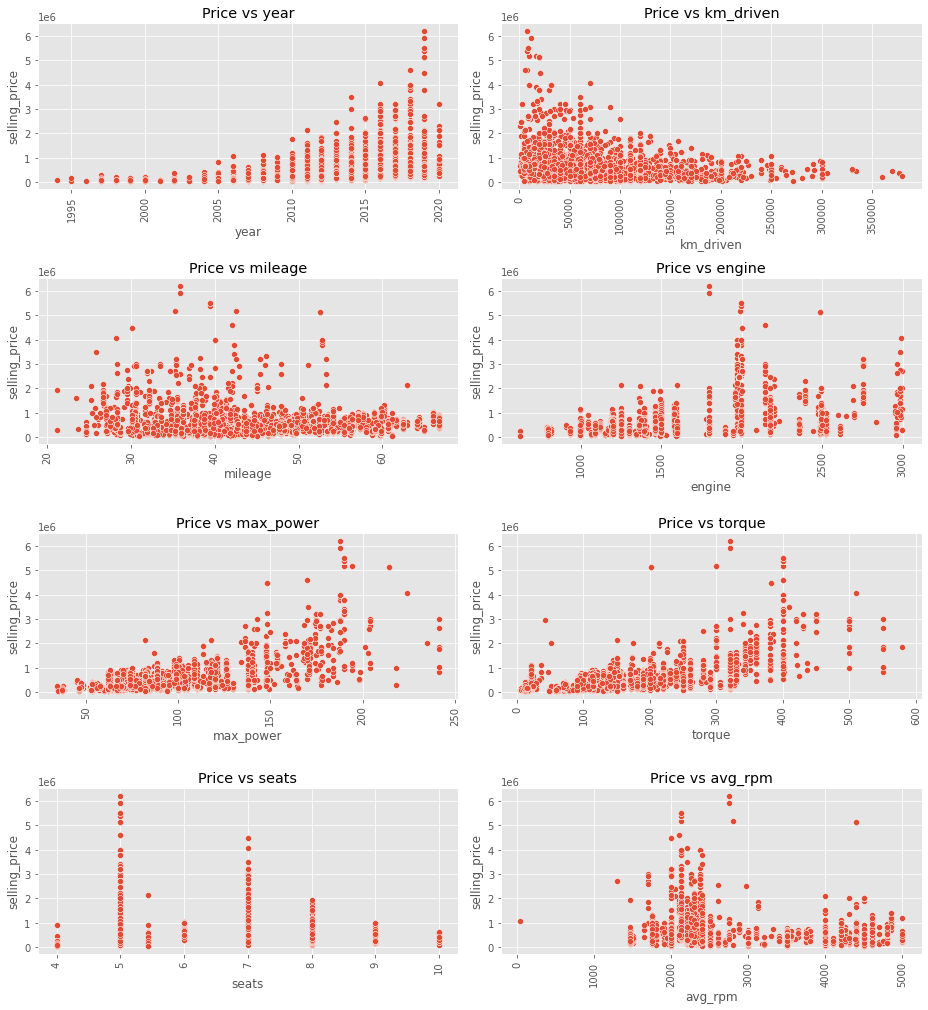

In [ ]:
numeric_columns = ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque',
       'seats', 'avg_rpm']
plt.figure(figsize=(13,17))

for i, variable in enumerate(numeric_columns):
                     plt.subplot(5,2,i+1)
                     sns.scatterplot(x=dftr_dub[variable],y=dftr_dub['selling_price'],palette='Set3').set(title='Price vs '+ variable)
                     plt.xticks(rotation=90)
                     plt.tight_layout()

BOX PLOT FOR CATEGORICAL DATA

*   Using boxplot to see how actually the data is with the effect from outlier
*   Most of data features still have outlier but milleage and avg_rpm are processed quite pretty well
*   We can see selling_price still have pretty much outlier






In [ ]:
dftr_numeric=dftr_dub.drop(labels=['fuel', 'seller_type',
       'transmission', 'owner','car_brand'],axis=1)

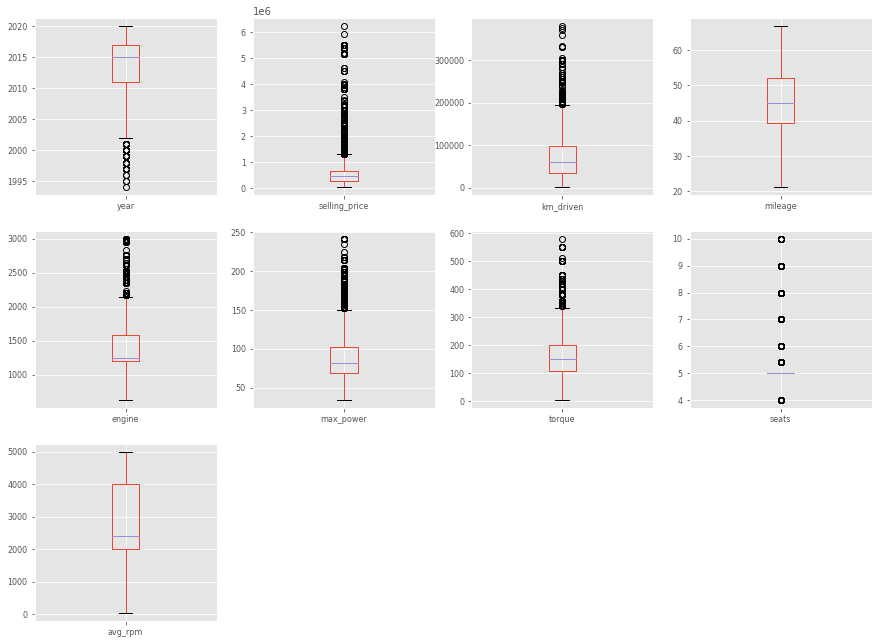

In [ ]:
fig=plt.figure(figsize=(15,15))
ax=fig.gca()
dftr_numeric.plot(kind='box',subplots=True,layout=(4,4),sharex=False,sharey=False,fontsize=8,ax=ax)
plt.show()

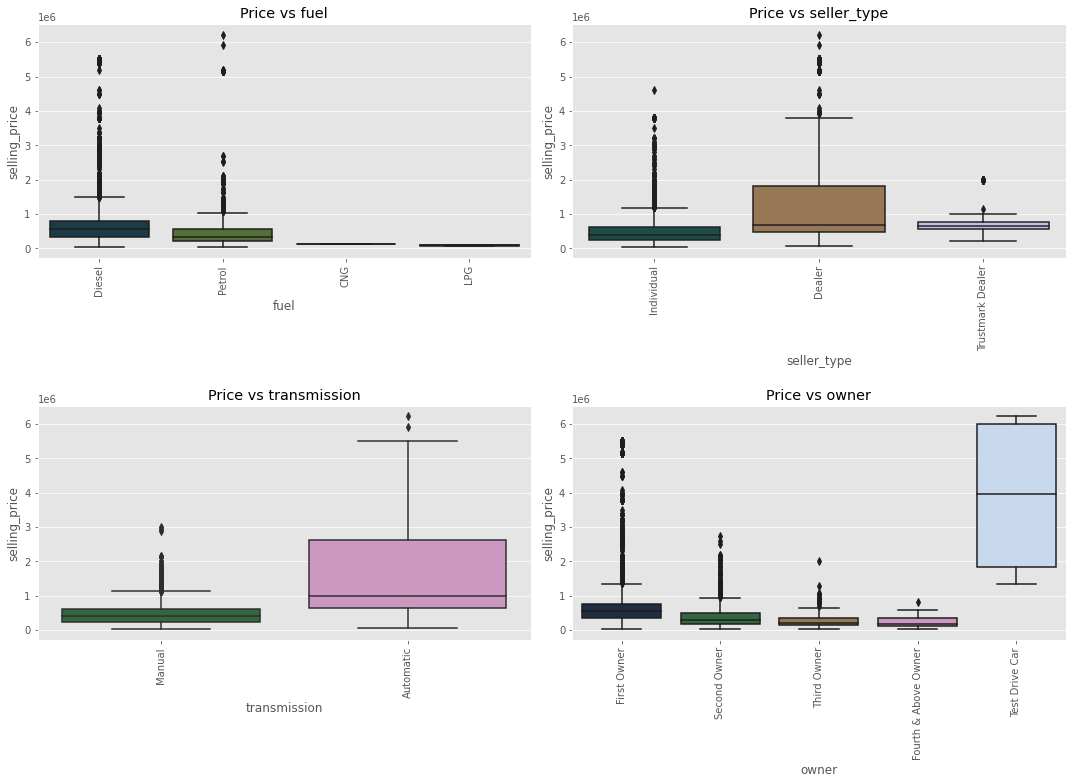

In [ ]:
numeric_columns = ['fuel', 'seller_type','transmission', 'owner']
plt.figure(figsize=(15,25))

for i, variable in enumerate(numeric_columns):
                     plt.subplot(5,2,i+1)
                     sns.boxplot(x=dftr_dub[variable],y=dftr_dub['selling_price'],palette='cubehelix').set(title='Price vs '+ variable)
                     plt.xticks(rotation=90)
                     plt.tight_layout()


# DATA SPLITTING

In [ ]:
X = dftr_final.drop(["selling_price"], axis=1)
y = dftr_final["selling_price"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)


In [ ]:
# IN CASE FOR SCALING 
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.fit_transform(X_test)


# MODEL


*   First running with simple linear regression model, Myself saw that the model was **way too overfitting**. 
*   Therefore to dealing with this problem, Myself decides to use recommend reduced overffing model which include: **Rige, Lasso, RandomForesr Regressor and Gradient** to see which give the best results 



## 1- LASSO

In [ ]:
from sklearn.linear_model import Lasso
from sklearn import metrics
lass_reg_model = Lasso()

In [ ]:
g=lass_reg_model.fit(X_train,y_train)
training_data_prediction = lass_reg_model.predict(X_test)
#training_data_prediction = lass_reg_model.predict(X_train)


In [ ]:
# R squared error
#score_1 = metrics.r2_score(y_train,training_data_prediction)
score_1 = metrics.r2_score(y_test ,training_data_prediction)

# Mean Absolute Error
#score_2 = metrics.mean_absolute_error(y_train, training_data_prediction)
score_2 = metrics.mean_absolute_error(y_test, training_data_prediction)

# Mean Squared Error
#score_3 = metrics.mean_squared_error(y_train, training_data_prediction)
score_3 = metrics.mean_squared_error(y_test, training_data_prediction)

# Root Mean squared Error
score_4 = np.sqrt(score_3)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)
print("Mean squared error : ", score_3)
print('Root Mean squared error : ', score_4)

## 2_ RIDGE

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import linear_model


In [ ]:
from sklearn import linear_model
reg = linear_model.Ridge(alpha=0.000001)
lm=reg.fit(X_train,y_train)

In [ ]:
preds=lm.predict(X_test)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, preds))
print('MSE:', metrics.mean_squared_error(y_test, preds))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preds)))
print('R squared: ',lm.score(X_train,y_train))


## 3_ RANDOM FOREST REGRESSION

The numerical data is **POSITIVELY SKEWED**. Generally, we should normalise it but, since we'll be using RANDOM FOREST which doesn't require normalisation/ scaling ,so, we'll skip it.



In [ ]:
from sklearn import RandomForestRegressor
regressor = RandomForestRegressor()

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
n_estimators

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [ ]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}


In [ ]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [ ]:
rf_random.fit(X_train,y_train)

In [ ]:
y_pred=rf_random.predict(X_test)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_train, y_pred))
print('MSE:', metrics.mean_squared_error(y_train, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))
#print('R squared: ',rf_random.score(X_test,y_train))


In [ ]:
c=dfte_final['Id']
dfte_final=dfte_final.drop('Id',axis=1)

In [ ]:
b=rf_random.predict(dfte_final)

In [ ]:
c=pd.Series(data=c,name='Id')
b=pd.Series(data=b,name='Predicted')

df= pd.concat([c,b], axis=1)

df.to_csv ('random.csv', index = False)


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
model = RandomForestRegressor()
model.fit(X_train,y_train)
rs = RandomizedSearchCV(RandomForestRegressor(),{
    'n_estimators':[int(x) for x in np.linspace(start = 100, stop = 500, num = 12)],
    'max_features':['sqrt'],
    'max_depth':[int(x) for x in np.linspace(5,30, num = 6)],
    'min_samples_split':[10,15],
    'min_samples_leaf':[5,10]}
     )


In [ ]:
rs.fit(X_train,y_train)

In [ ]:
rs.best_estimator_

In [ ]:
y_pred=rs.best_estimator_.predict(X_test)

In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

## 4_ GRADIENT 

*GRADIENT_MODEL_1*

In [ ]:
from sklearn.preprocessing import RobustScaler

In [ ]:
params = {'n_estimators': 500,
          'max_depth': 3,
          'min_samples_split': 3,
          'learning_rate': 0.02,
          'loss': 'ls'}
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

In [ ]:
y_pred = reg.predict(X_test)

In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [ ]:
b = reg.predict(dfte_final)

In [ ]:
c=pd.Series(data=c,name='Id')
b=pd.Series(data=b,name='Predicted')

df= pd.concat([c,b], axis=1)

df.to_csv ('GRADI.csv', index = False)


*GRADIENT_MODEL_2*

In [ ]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

gb = GradientBoostingRegressor()

# Rate at which correcting is being made
learning_rate = [0.001, 0.01, 0.1, 0.2]
# Number of trees in Gradient boosting
n_estimators=list(range(500,1000,100))
# Maximum number of levels in a tree
max_depth=list(range(4,9,4))
# Minimum number of samples required to split an internal node
min_samples_split=list(range(4,9,2))
# Minimum number of samples required to be at a leaf node.
min_samples_leaf=[1,2,5,7]
# Number of fearures to be considered at each split
max_features=['auto','sqrt']

# Hyperparameters dict
param_grid = {"learning_rate":learning_rate,
              "n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}

gb_rs = RandomizedSearchCV(estimator = gb, param_distributions = param_grid)

In [ ]:
gb_rs.fit(X_train,y_train)

In [ ]:
gb_rs.best_estimator_

In [ ]:
y_pred=gb_rs.best_estimator_.predict(X_test)

In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))